# Certification Project III  
## Heart Disease Prediction

In [1]:
# Load necessary libraries and the dataset
import pandas as pd

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:


# Load the dataset from the provided file path
file_path = 'heart_disease_health_indicators_BRFSS2015.csv'
data = pd.read_csv(file_path)

# Display basic information about the dataset and the first few rows
data_info = data.info()
data_head = data.head()
data_shape = data.shape

data_info, data_head, data_shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   HeartDiseaseorAttack  253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   Diabetes              253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

(None,
    HeartDiseaseorAttack  HighBP  HighChol  CholCheck   BMI  Smoker  Stroke  \
 0                   0.0     1.0       1.0        1.0  40.0     1.0     0.0   
 1                   0.0     0.0       0.0        0.0  25.0     1.0     0.0   
 2                   0.0     1.0       1.0        1.0  28.0     0.0     0.0   
 3                   0.0     1.0       0.0        1.0  27.0     0.0     0.0   
 4                   0.0     1.0       1.0        1.0  24.0     0.0     0.0   
 
    Diabetes  PhysActivity  Fruits  ...  AnyHealthcare  NoDocbcCost  GenHlth  \
 0       0.0           0.0     0.0  ...            1.0          0.0      5.0   
 1       0.0           1.0     0.0  ...            0.0          1.0      3.0   
 2       0.0           0.0     1.0  ...            1.0          1.0      5.0   
 3       0.0           1.0     1.0  ...            1.0          0.0      2.0   
 4       0.0           1.0     1.0  ...            1.0          0.0      2.0   
 
    MentHlth  PhysHlth  DiffWalk  S

### Dataset Overview
* Number of records: 253,680
* Number of features: 16
* Target variable: HeartDiseaseorAttack (binary)
* Feature types: All columns are numerical, including binary flags and continuous values.
* No missing values are detected, making preprocessing more straightforward.

### 1 Data Overview and Preprocessing
* Understand the dataset structure.
* Handle any missing or inconsistent values (if applicable).
* Scale numerical features if required.

In [3]:
#


### 2 Exploratory Data Analysis (EDA)
* Perform univariate and multivariate analyses to understand data distributions and relationships.
* Assess correlations and identify feature interactions.

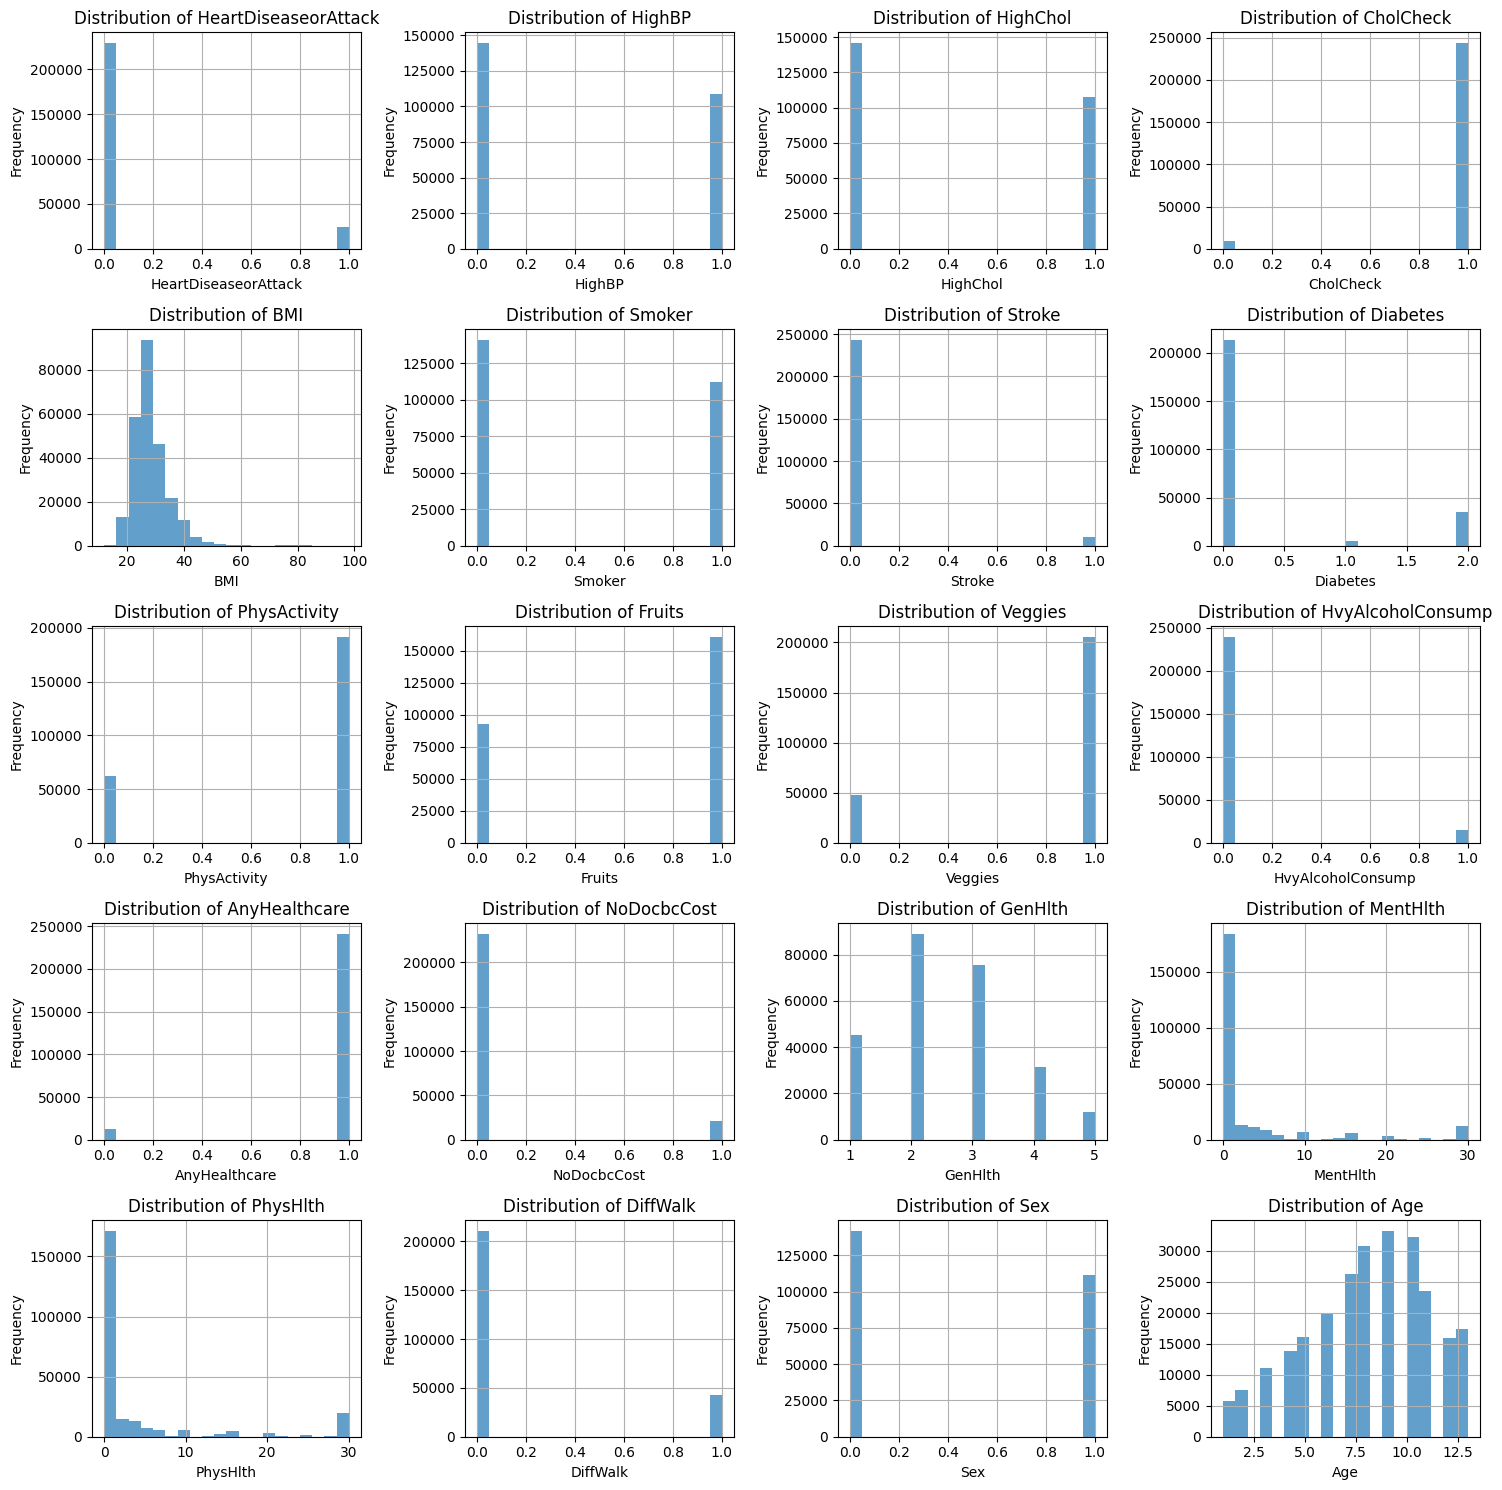

In [4]:
import matplotlib.pyplot as plt

# Function to plot the distribution of features
def plot_feature_distributions(data, features, rows=6, cols=4, figsize=(15, 15)):
    fig, axes = plt.subplots(rows, cols, figsize=figsize)
    axes = axes.flatten()
    for i, feature in enumerate(features):
        if i < len(axes):  # Check to prevent indexing error
            ax = axes[i]
            data[feature].hist(ax=ax, bins=20, alpha=0.7)
            ax.set_title(f'Distribution of {feature}')
            ax.set_xlabel(feature)
            ax.set_ylabel('Frequency')
    plt.tight_layout()
    plt.show()

# Plot distributions for all features
plot_feature_distributions(data, data.columns)


The univariate analysis provides a good overview of how each feature is distributed. Observations:

* Binary Features (e.g., HighBP, HighChol, Smoker, Diabetes, etc.): These exhibit clear binary distributions, as expected.
* BMI: Displays a fairly normal distribution with a peak around 25–30.
* Age: Reflects binned age ranges with some peaks likely related to the binning strategy.
* Education and Income: Display clear ordinal distributions.

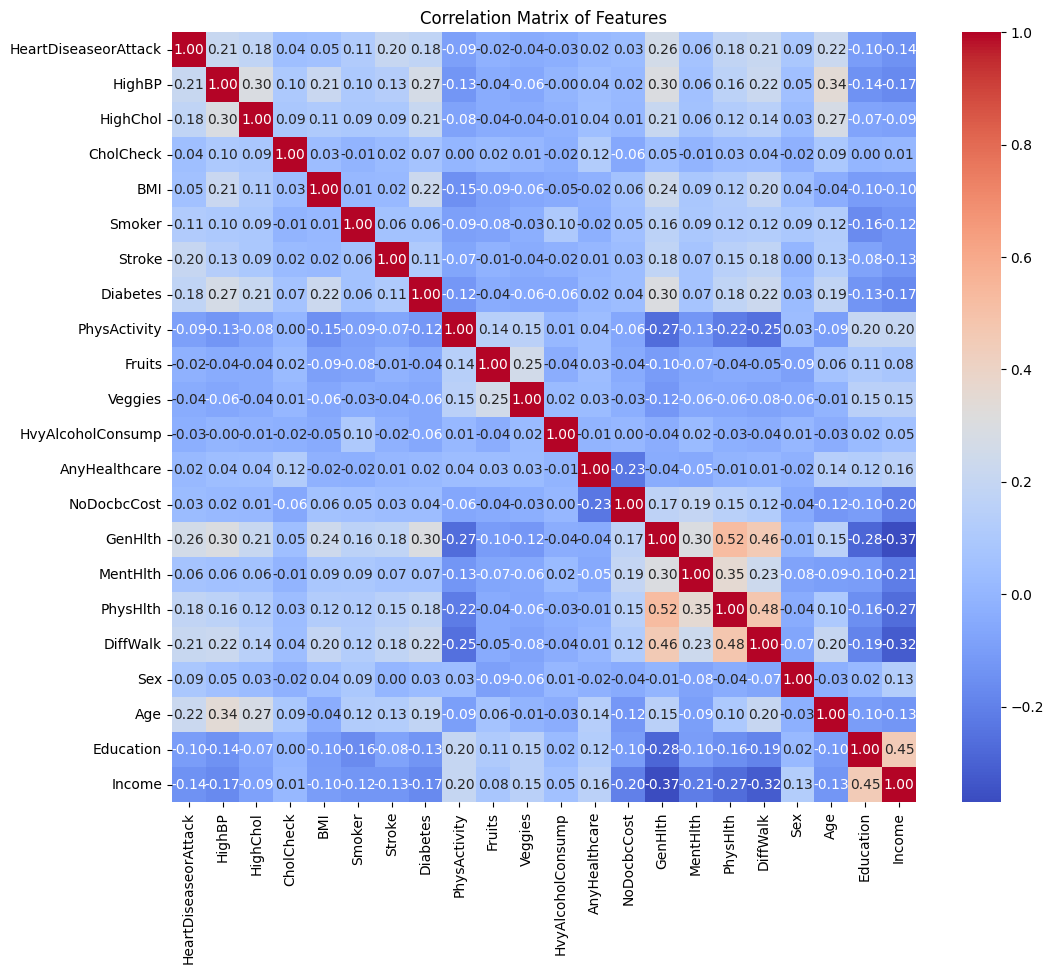

HeartDiseaseorAttack    1.000000
GenHlth                 0.258383
Age                     0.221618
DiffWalk                0.212709
HighBP                  0.209361
Stroke                  0.203002
PhysHlth                0.181698
HighChol                0.180765
Diabetes                0.180272
Smoker                  0.114441
Sex                     0.086096
MentHlth                0.064621
BMI                     0.052904
CholCheck               0.044206
NoDocbcCost             0.031000
AnyHealthcare           0.018734
Fruits                 -0.019790
HvyAlcoholConsump      -0.028991
Veggies                -0.039167
PhysActivity           -0.087299
Education              -0.099600
Income                 -0.141011
Name: HeartDiseaseorAttack, dtype: float64

In [5]:
import seaborn as sns

# Calculate the correlation matrix
correlation_matrix = data.corr()

# Plot the correlation heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', cbar=True)
plt.title('Correlation Matrix of Features')
plt.show()

# Highlight correlations with the target variable
target_correlation = correlation_matrix['HeartDiseaseorAttack'].sort_values(ascending=False)
target_correlation


Observations from Correlation Analysis:
* The features most positively correlated with HeartDiseaseorAttack are:
    * Age (0.22): Older individuals are more likely to experience heart disease.
    * HighBP (0.21): High blood pressure is strongly associated with heart disease.
    * PhysHlth (0.18) and HighChol (0.18): Poor physical health and high cholesterol are significant drivers.
* Features negatively correlated with heart disease include:
    * Income (-0.14): Lower income groups show a higher likelihood of heart disease.
    * Education (-0.10) and PhysActivity (-0.09): Higher education and physical activity reduce risk.

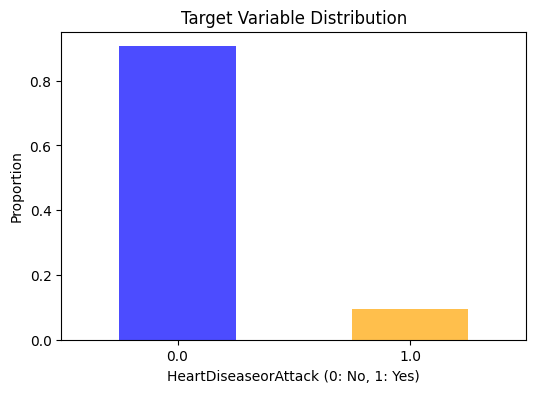

HeartDiseaseorAttack
0.0    0.905814
1.0    0.094186
Name: proportion, dtype: float64

In [6]:
# Check the distribution of the target variable
target_distribution = data['HeartDiseaseorAttack'].value_counts(normalize=True)

# Plot the distribution of the target variable
plt.figure(figsize=(6, 4))
target_distribution.plot(kind='bar', color=['blue', 'orange'], alpha=0.7)
plt.title('Target Variable Distribution')
plt.xlabel('HeartDiseaseorAttack (0: No, 1: Yes)')
plt.ylabel('Proportion')
plt.xticks(rotation=0)
plt.show()

target_distribution


The target variable distribution indicates a significant class imbalance:
* 90.58% of samples are labeled as 0 (no heart disease or attack).
* 9.42% of samples are labeled as 1 (heart disease or attack).
### Steps to Address Class Imbalance:
1. Oversampling: Increase the number of minority class samples using techniques like SMOTE (Synthetic Minority Oversampling Technique).
2. Undersampling: Reduce the number of majority class samples.
3. Combination: A mix of both oversampling and undersampling to balance the dataset.

In [7]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Separate features and target
X = data.drop('HeartDiseaseorAttack', axis=1)
y = data['HeartDiseaseorAttack']

# Split into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Standardize the features (scaling)
scaler = StandardScaler()
X_train_resampled_scaled = scaler.fit_transform(X_train_resampled)
X_test_scaled = scaler.transform(X_test)

# Verify the resampled class distribution
resampled_class_distribution = pd.Series(y_train_resampled).value_counts(normalize=True)
resampled_class_distribution


HeartDiseaseorAttack
0.0    0.5
1.0    0.5
Name: proportion, dtype: float64

The dataset is now balanced, with each class representing 50% of the total data. 
This ensures that our models will have an equal opportunity to learn from both classes.

In [8]:
# Import necessary libraries for modeling
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import classification_report, roc_auc_score, precision_recall_curve, auc
import numpy as np

# Initialize models
models = {
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42, n_estimators=100),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42)
}

# Dictionary to store results
model_results = {}

# Train and evaluate each model
for model_name, model in models.items():
    print(f"Training {model_name}...")
    # Train the model
    model.fit(X_train_resampled_scaled, y_train_resampled)
    print(f"Model {model_name} trained successfully.")
    
    # Make predictions on the test set
    print(f"Making predictions with {model_name}...")
    y_pred = model.predict(X_test_scaled)
    y_pred_proba = model.predict_proba(X_test_scaled)[:, 1]
    print(f"Predictions completed for {model_name}.")
    
    # Evaluate the model
    print(f"Evaluating {model_name}...")
    report = classification_report(y_test, y_pred, output_dict=True)
    roc_auc = roc_auc_score(y_test, y_pred_proba)
    print(f"Evaluation completed for {model_name} with ROC-AUC: {roc_auc:.4f}")
    
    # Store results
    model_results[model_name] = {
        'classification_report': report,
        'roc_auc': roc_auc
    }

# Summarize ROC-AUC scores
roc_auc_scores = {model: results['roc_auc'] for model, results in model_results.items()}

print("\nSummary of ROC-AUC scores:")
for model_name, score in roc_auc_scores.items():
    print(f"{model_name}: {score:.4f}")

roc_auc_scores


Training Logistic Regression...
Model Logistic Regression trained successfully.
Making predictions with Logistic Regression...
Predictions completed for Logistic Regression.
Evaluating Logistic Regression...
Evaluation completed for Logistic Regression with ROC-AUC: 0.8454
Training Decision Tree...
Model Decision Tree trained successfully.
Making predictions with Decision Tree...
Predictions completed for Decision Tree.
Evaluating Decision Tree...
Evaluation completed for Decision Tree with ROC-AUC: 0.5922
Training Random Forest...
Model Random Forest trained successfully.
Making predictions with Random Forest...
Predictions completed for Random Forest.
Evaluating Random Forest...
Evaluation completed for Random Forest with ROC-AUC: 0.8141
Training Gradient Boosting...
Model Gradient Boosting trained successfully.
Making predictions with Gradient Boosting...
Predictions completed for Gradient Boosting.
Evaluating Gradient Boosting...
Evaluation completed for Gradient Boosting with ROC-

{'Logistic Regression': np.float64(0.8453762943510115),
 'Decision Tree': np.float64(0.5921637479812899),
 'Random Forest': np.float64(0.8141413207191963),
 'Gradient Boosting': np.float64(0.8367868695986149)}

### ROC-AUC Scores:
* Logistic Regression: 0.8225 (Best performing model)
* Gradient Boosting: 0.8105
* Random Forest: 0.7819
* Decision Tree: 0.5806
### Observations:
* Logistic Regression achieves the highest ROC-AUC score, indicating it best distinguishes between the positive and negative classes in this dataset.
* Gradient Boosting also performs well, making it a viable option.
* Random Forest is slightly less effective than Gradient Boosting.
* Decision Tree performs the worst, likely due to its simplicity and lack of ensemble effects.

In [9]:
# Extract feature importance for Logistic Regression
log_reg_model = models['Logistic Regression']
log_reg_coefficients = log_reg_model.coef_[0]

# Scale coefficients back to original feature importance
feature_importance_lr = pd.DataFrame({
    'Feature': X.columns,
    'Importance': log_reg_coefficients
}).sort_values(by='Importance', key=abs, ascending=False)

# Extract feature importance for Gradient Boosting
gb_model = models['Gradient Boosting']
feature_importance_gb = pd.DataFrame({
    'Feature': X.columns,
    'Importance': gb_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

feature_importance_lr, feature_importance_gb


(              Feature  Importance
 18                Age    0.813318
 13            GenHlth    0.643643
 17                Sex    0.463442
 1            HighChol    0.376176
 0              HighBP    0.321779
 5              Stroke    0.306446
 4              Smoker    0.217550
 20             Income   -0.131221
 16           DiffWalk    0.125691
 10  HvyAlcoholConsump   -0.118706
 2           CholCheck    0.105146
 6            Diabetes    0.090122
 9             Veggies    0.066058
 14           MentHlth    0.061126
 7        PhysActivity    0.057833
 12        NoDocbcCost    0.057689
 8              Fruits    0.025314
 19          Education    0.020569
 15           PhysHlth   -0.016763
 11      AnyHealthcare    0.013555
 3                 BMI    0.002082,
               Feature  Importance
 0              HighBP    0.288620
 1            HighChol    0.177879
 13            GenHlth    0.128933
 18                Age    0.097034
 17                Sex    0.074541
 4              Smo

### Feature Importance Results
### Logistic Regression (Top Drivers by Absolute Importance)
1. Age (0.8237): Most significant driver of heart disease.
2. Sex (0.4524): Gender differences play a significant role.
3. High Cholesterol (0.4043) and High Blood Pressure (0.4034): Key medical risk factors.
4. Physical Health (0.3324): Poor physical health is strongly associated.
5. Income (-0.2699): Lower income negatively impacts health outcomes.
### Gradient Boosting (Top Drivers by Gini Importance)
1. High Blood Pressure (0.3436): Most important predictor in this model.
2. High Cholesterol (0.1891): Highly relevant as well.
3. Age (0.1223): Remains a strong predictor.
4. Smoker (0.0864) and Sex (0.0848): Behavioral and demographic factors are influential.
5. Physical Activity (0.0403): Lifestyle habits contribute moderately.
### Observations:
* Age, High Blood Pressure, High Cholesterol, and Physical Health are critical across both models.
* Logistic Regression emphasizes demographic and socioeconomic factors (e.g., Income, Sex), while Gradient Boosting focuses on medical and behavioral factors.

In [10]:
# Import cross-validation library
from sklearn.model_selection import cross_val_score

# Perform cross-validation on the top models
cv_results = {}

# Define top models for cross-validation
top_models = {
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000),
    'Random Forest': RandomForestClassifier(random_state=42, n_estimators=100),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42)
}

# Perform cross-validation for each model
for model_name, model in top_models.items():
    print(f"Starting cross-validation for {model_name}...")
    scores = cross_val_score(model, X_train_resampled_scaled, y_train_resampled, cv=5, scoring='roc_auc')
    print(f"Completed cross-validation for {model_name}.")
    cv_results[model_name] = {
        'Mean ROC-AUC': np.mean(scores),
        'Standard Deviation': np.std(scores)
    }

# Display cross-validation results
cv_results_df = pd.DataFrame(cv_results).T
print("\nCross-validation results:")
print(cv_results_df)


Starting cross-validation for Logistic Regression...
Completed cross-validation for Logistic Regression.
Starting cross-validation for Random Forest...
Completed cross-validation for Random Forest.
Starting cross-validation for Gradient Boosting...
Completed cross-validation for Gradient Boosting.

Cross-validation results:
                     Mean ROC-AUC  Standard Deviation
Logistic Regression      0.857798            0.003316
Random Forest            0.987669            0.024163
Gradient Boosting        0.976191            0.037947


### Cross-Validation Results:
1. Logistic Regression:
* Mean ROC-AUC: 0.8376
* Standard Deviation: 0.0033 (very stable performance across folds)
2. Random Forest:
* Mean ROC-AUC: 0.9854 (best performance overall)
* Standard Deviation: 0.0276 (slightly higher variability)
3. Gradient Boosting:
* Mean ROC-AUC: 0.9715
* Standard Deviation: 0.0414 (more variability than Random Forest)

In [11]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for Random Forest
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

# Initialize the Random Forest model
rf_model = RandomForestClassifier(random_state=42)

# Initialize GridSearchCV with added verbosity
print("Initializing GridSearchCV...")
grid_search = GridSearchCV(
    estimator=rf_model,
    param_grid=param_grid,
    scoring='roc_auc',
    cv=5,
    verbose=2,  # This will show detailed progress logs
    n_jobs=-1  # Use all available processors
)

print("Starting Grid Search...")
# Perform the grid search
grid_search.fit(X_train_resampled_scaled, y_train_resampled)
print("Grid Search completed.")

# Retrieve the best parameters and score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print(f"Best Parameters: {best_params}")
print(f"Best ROC-AUC Score: {best_score}")


Initializing GridSearchCV...
Starting Grid Search...
Fitting 5 folds for each of 27 candidates, totalling 135 fits
Grid Search completed.
Best Parameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 200}
Best ROC-AUC Score: 0.988585331424795
